- Class Methods: 
    - `IBMProvider.save_account(TOKEN, INSTANCE)`: Save your account to disk for future use and optionally set a default hub/group/project to be used when loading your account.
    - `IBMProvider.saved_accounts()`: View the accounts saved to disk.
    - `IBMProvider.delete_account()`: Delete the saved account from disk.
    - `IBMProvider.active_account()`: List the account currently active in the session.

- Constructor Usage: 
    - `IBMProvider()`: Load account and default hub/group/project using saved credentials.
    - `IBMProvider(TOKEN)`: Enable your account in the current session.

In [8]:
from qiskit_ibm_provider import IBMProvider
#IBMProvider.save_account('5ab66cd482d76c8f33.................2e22d22700ef2b93be5025055692', overwrite=True)
provider = IBMProvider()
provider.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_perth')>]

- `backends()`: Returns all backends available to the account.

- `get_backend(NAME)`: Returns the named backend.

In [9]:
back = provider.get_backend("ibm_nairobi")
back

<IBMBackend('ibm_nairobi')>

# Filtering the Backends

- The below filters can be combined as desired.

In [10]:
provider.backends(simulator=False, operational=True)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>]

In [11]:
provider.backends(min_num_qubits=5, simulator=False, operational=True)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>]

In [12]:
from qiskit_ibm_provider import least_busy

small_devices = provider.backends(min_num_qubits=5, simulator=False, operational=True)
backend = least_busy(small_devices)
print(backend)

<IBMBackend('ibm_brisbane')>


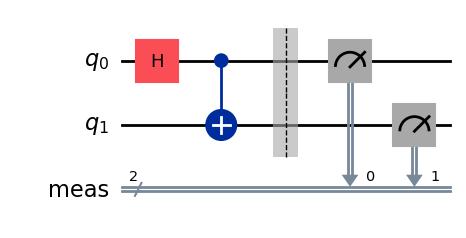

In [16]:
from qiskit import *

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Drwaing the circuit in a clifford style (default)
# qc.draw(style="clifford", output="mpl")

# Drawing the circuit in a transpiled style or a iqp style
qc.draw(style="iqp", output="mpl")